In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
print(train_images.shape), print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


(None, None)

In [11]:
print(train_labels.shape)

(50000, 1)


In [12]:
print(test_labels.shape)

(10000, 1)


In [13]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
label_index = 6# Replace with the index you're interested in
class_name = class_names[label_index]
print(f"Class name for label {label_index}: {class_name}")


NameError: name 'class_names' is not defined

In [15]:
import numpy as np

# Assuming 'train_labels' is your dataset labels
unique_labels_dataset = np.unique(train_labels)
num_classes_dataset = len(unique_labels_dataset)

print("Number of unique labels in the dataset:", num_classes_dataset)


Number of unique labels in the dataset: 10


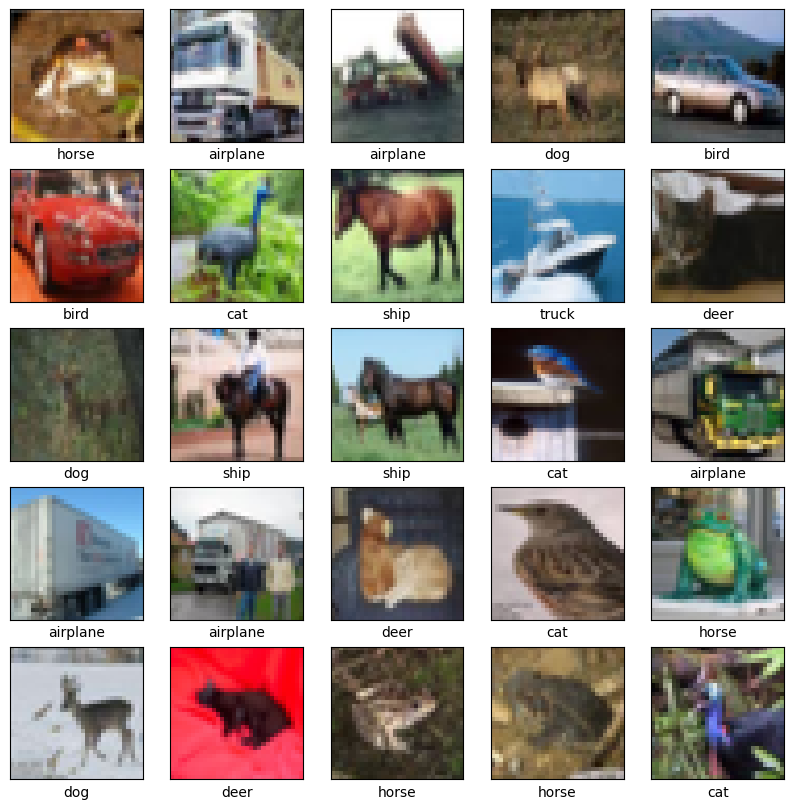

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


1563/1563 [==============================] - 36s 22ms/step - loss: 1.5575 - accuracy: 0.4298 - val_loss: 1.2728 - val_accuracy: 0.5509
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2004 - accuracy: 0.5746 - val_loss: 1.1313 - val_accuracy: 0.6019
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0401 - accuracy: 0.6333 - val_loss: 1.0348 - val_accuracy: 0.6331
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9397 - accuracy: 0.6709 - val_loss: 0.9555 - val_accuracy: 0.6694
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8707 - accuracy: 0.6949 - val_loss: 0.9627 - val_accuracy: 0.6687
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8159 - accuracy: 0.7160 - val_loss: 0.9383 - val_accuracy: 0.6751
Epoch 7/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.7685 - accuracy: 0.7317 - val_loss: 0.912

313/313 - 2s - loss: 0.9249 - accuracy: 0.6908 - 2s/epoch - 6ms/step


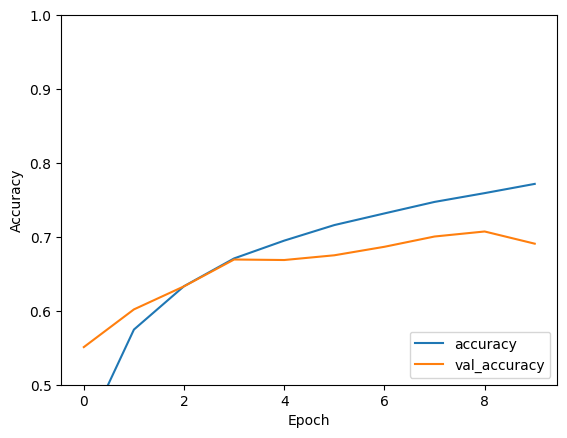

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [23]:
print(test_acc)

0.6908000111579895


In [27]:
label_index = 0  # Replace with the index you're interested in
class_name = class_names[label_index]
print(f"Class name for label {label_index}: {class_name}")

Class name for label 0: automobile
